In [2]:
# can be removed if LinOT package is installed via pip
import sys
sys.path.append("../../lib")

import numpy as np

import LinOT
import LinOT.Visualization as Vis

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rc('image', interpolation='nearest')
matplotlib.rc('figure',facecolor='white')
matplotlib.rc('image',cmap='viridis')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
# create a set of point clouds sampled from Gaussians
# add random weight to points to make it a bit more challenging
nSamples=100
nPoints=100
means=2*(np.random.random(size=(nSamples,))-0.5)
std=0.5+np.random.random(size=(nSamples,))
xList=np.array([np.random.normal(loc=mean,scale=std,size=(nPoints,)) for mean,std in zip(means,std)])
xList=np.sort(xList,axis=1)
mList=np.random.random(size=(nSamples,nPoints))
mList=np.einsum(mList,[0,1],1/np.sum(mList,axis=1),[0],[0,1])

In [3]:
Embedding=LinOT.LinW2_1dEmbedding(1000)
Embedding.addSamples((xList,mList))
Embedding.centerSamples()

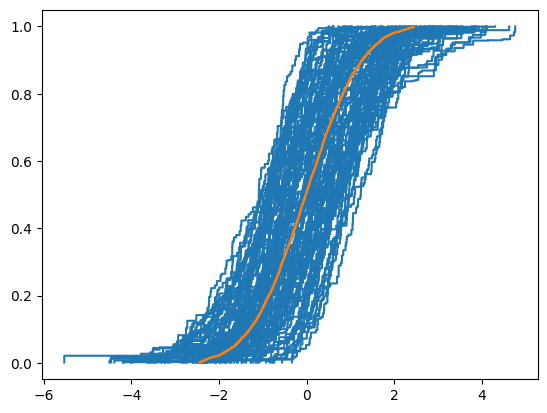

In [4]:
# show all cumulative distribution functions,
# and the one corresponding to the mean measure
for i in range(len(xList)):
    dat=Embedding.convertEuclideanToRaw(Embedding.samples[i])
    Vis.cumplot(*dat,c=colors[0])

dat=Embedding.getMeanExp()
Vis.cumplot(*dat,c=colors[1])
    
plt.show()

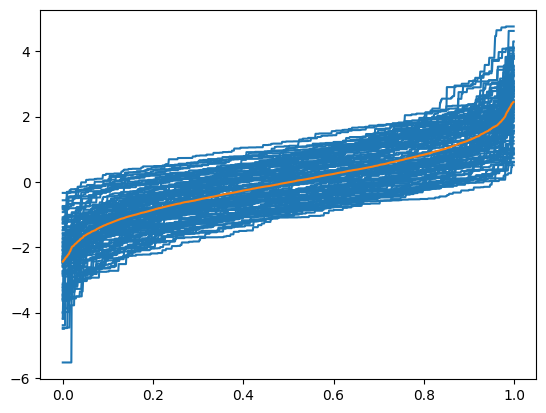

In [5]:
# inverse cumulative distribution functions
for i in range(len(Embedding.samples)):
    plt.plot(Embedding.pos,Embedding.mean+Embedding.samples[i],c=colors[0])

plt.plot(Embedding.pos,Embedding.mean,c=colors[1])
    
plt.show()

In [6]:
Embedding.performPCA()

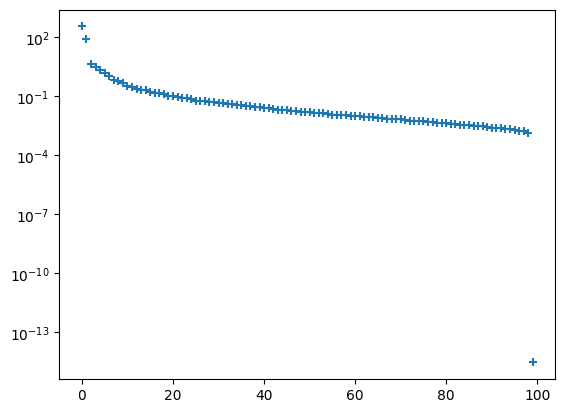

In [7]:
Vis.PCASpectrum(Embedding)

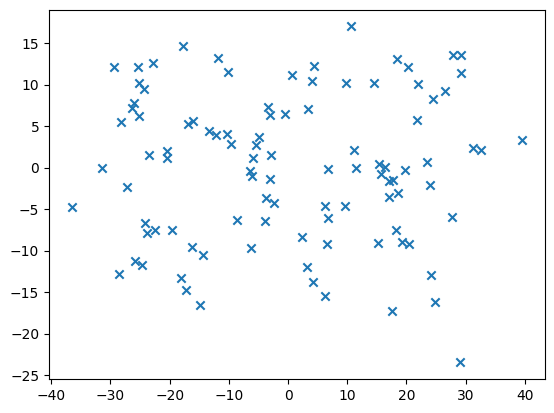

In [8]:
Vis.PCAPlot(Embedding)

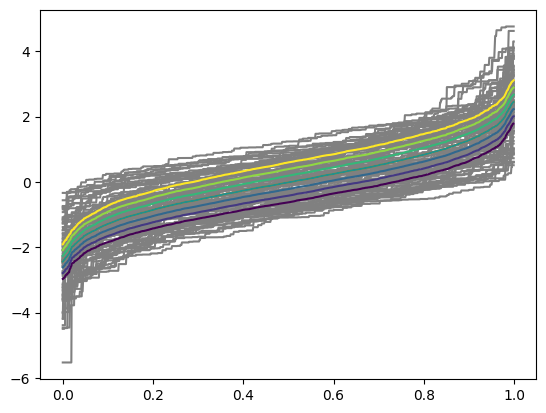

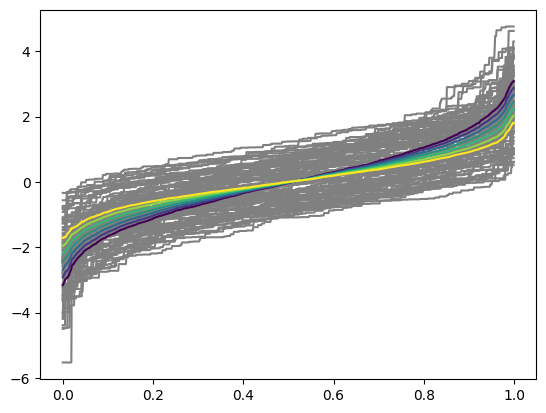

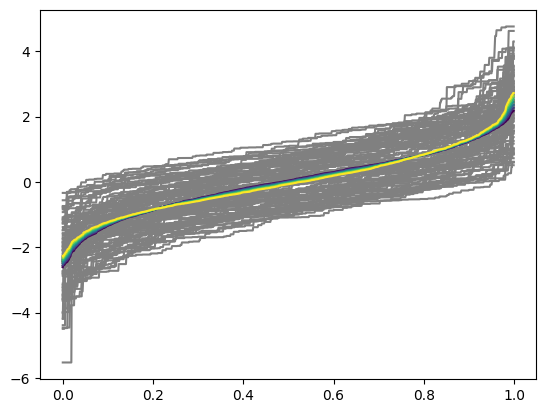

In [9]:
# show dominant eigenmodes in inverse cumul representation
for i in range(3):
    for j in range(len(xList)):
        plt.plot(Embedding.pos,Embedding.mean+Embedding.samples[j],c=cm.gray(0.5))

    plt.plot(Embedding.pos,Embedding.mean,c=colors[1])
    for j,t in enumerate(np.linspace(-1,1,num=7)):
        plt.plot(Embedding.pos,Embedding.mean+t*Embedding.pca_std[i]*Embedding.pca_vec[i],c=cm.viridis(j/6))

    plt.show()

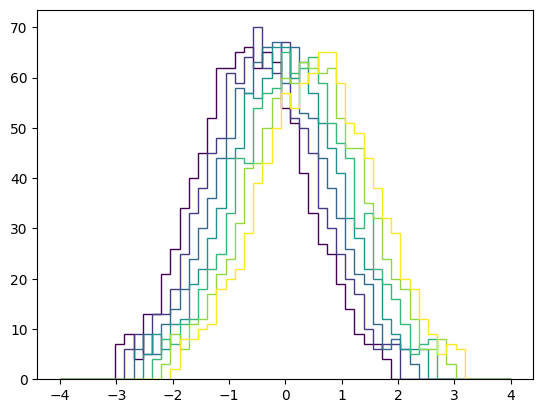

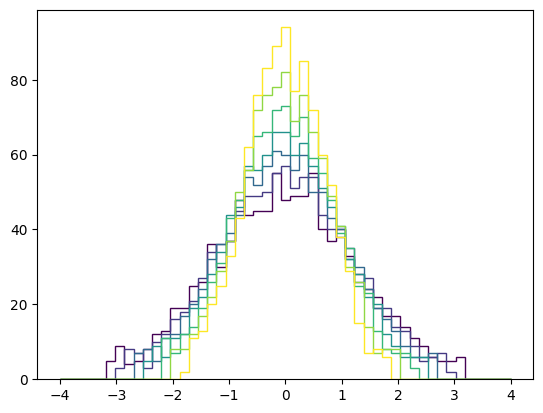

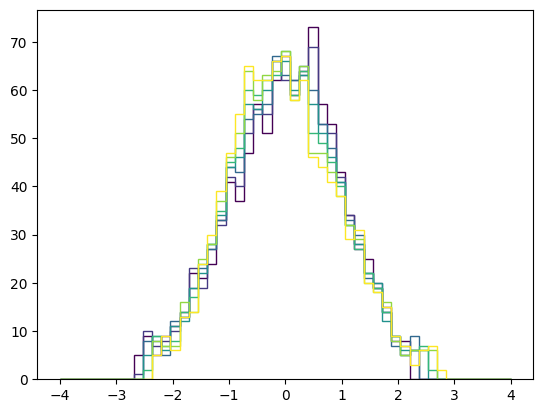

In [10]:
# show dominant eigenmodes as binned histograms
bins=np.linspace(-4,4,num=50)
for i in range(3):
    Vis.histseqplot(Embedding,Embedding.pca_std[i]*Embedding.pca_vec[i],bins=bins)
    plt.show()